In [8]:
%matplotlib inline
import pywt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'facies_vectors.csv'
training_data = pd.read_csv(filename)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [40]:
training_data.describe()

/Users/mablou/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,NaN,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,NaN,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,NaN,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [9]:
len(np.unique(training_data['Well Name']))

10

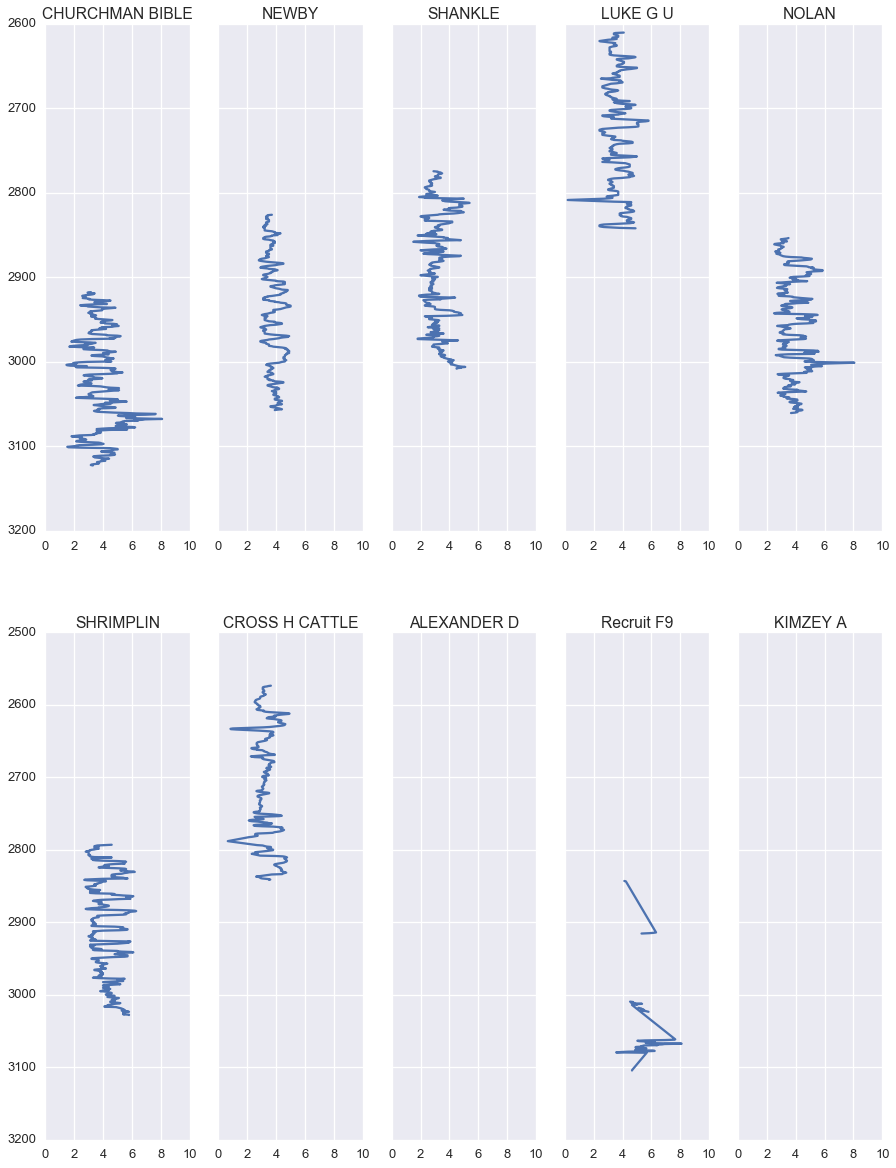

In [39]:
sns.set_context("talk")
nrows=2
fig, axs = plt.subplots(figsize=(15,20), 
                        nrows=nrows, ncols=5,     # fix as above
                        #gridspec_kw=dict(hspace=0.4),
                        sharey='row',sharex=False) # Much control of gridspec

grouped = training_data.groupby(['Well Name'])
targets = zip(grouped.groups.keys(), axs.flatten())


for i in range(nrows):
    axs[i,0].invert_yaxis()

for i, (key, ax) in enumerate(targets):
    ax.plot(grouped.get_group(key).PE,grouped.get_group(key).Depth)
    ax.set_title('%s'%key)
    ax.set_xlim(0,10)

In [64]:
print(pywt.wavelist())

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [67]:
pywt.Modes.modes

['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization']

In [91]:
w = pywt.Wavelet('db3')
w.dec_len

6

404 204 204
463 234 234
449 227 227
461 233 233
415 210 210
471 238 238
501 253 253
466 235 235
80 42 42
439 222 222


2098

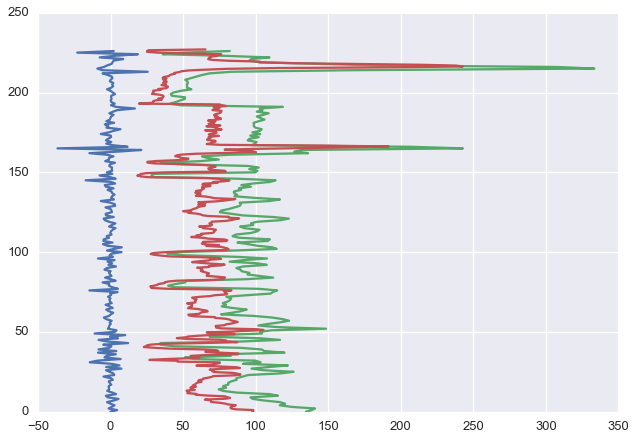

In [96]:
cA=[]
cD=[]

grouped = training_data.groupby(['Well Name'])

for key in grouped.groups.keys():
    tempA, tempD = pywt.dwt(grouped.get_group(key).GR,w,mode='symmetric')
    cA.append(tempA)
    cD.append(tempD)
    print(len(grouped.get_group(key).GR),len(tempA),len(tempD))
    
    if (key == 'SHANKLE'):
        fig, ax = plt.subplots()
        ax.plot(tempD,range(len(tempD)))
        ax.plot(tempA,range(len(tempA)))
        ax.plot(grouped.get_group(key).GR,np.linspace(0,227,449))
sum([len(cA[i]) for i in range(len(cA))])

In [94]:
for key in grouped.groups.keys():
    print(key)

CHURCHMAN BIBLE
NEWBY
SHANKLE
LUKE G U
NOLAN
SHRIMPLIN
CROSS H CATTLE
ALEXANDER D
Recruit F9
KIMZEY A


In [123]:
db3 = pywt.Wavelet('db3')
data = grouped.get_group('SHANKLE').GR
depth = grouped.get_group('SHANKLE').Depth
pywt.dwt_max_level(len(data), db3)

6

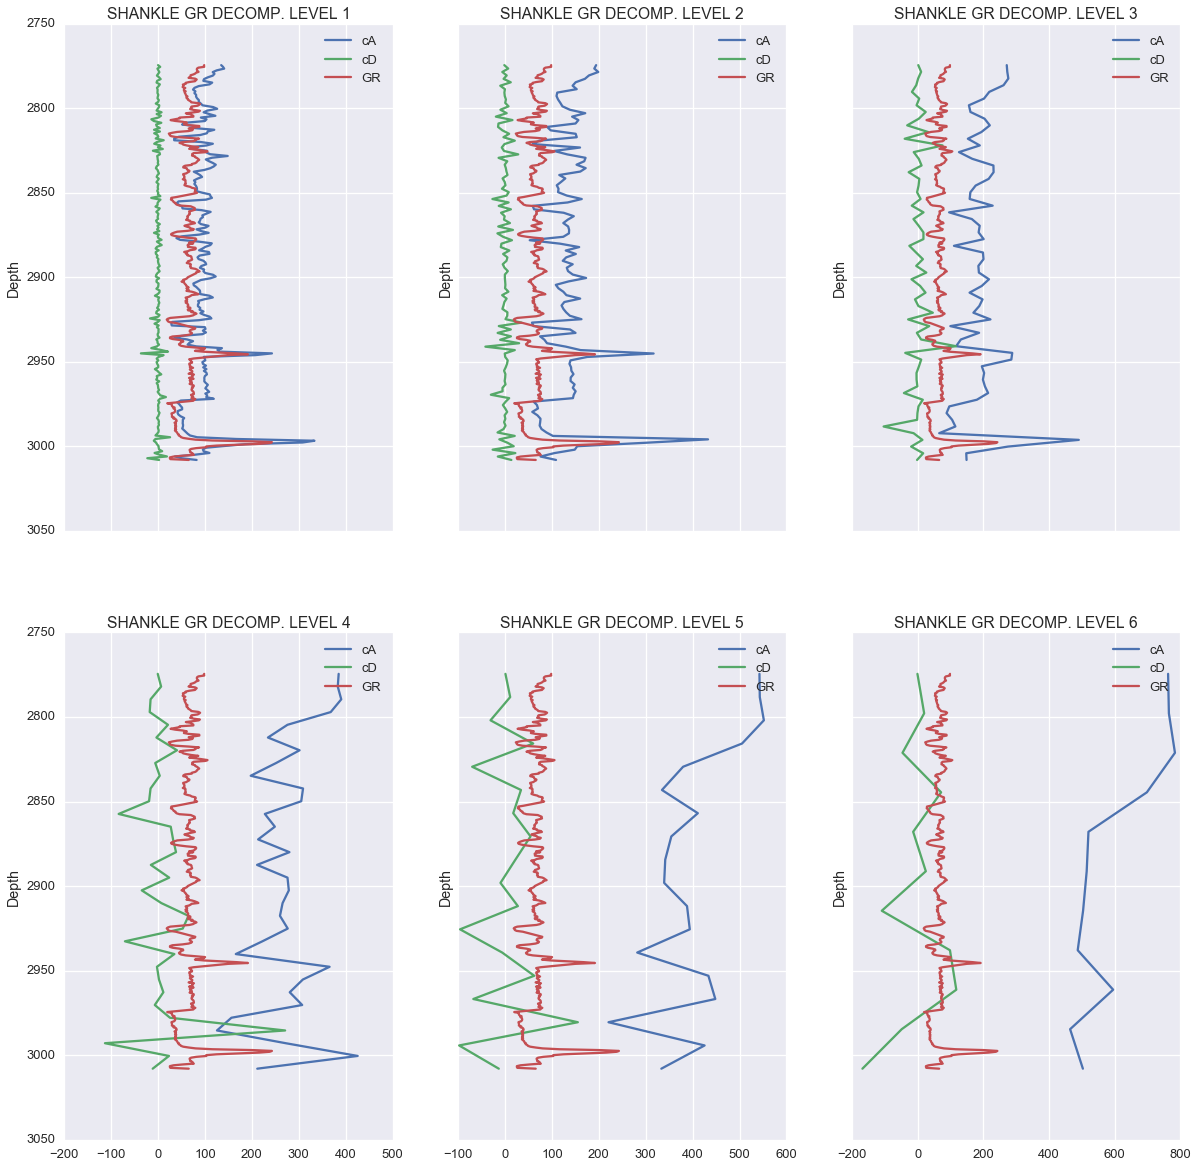

In [143]:
n_levels = 6

fig, axs = plt.subplots(figsize=(20,20), 
                        nrows=2, ncols=3, 
                        #gridspec_kw=dict(hspace=0.4),
                        sharey='row',sharex='col') # Much control of gridspec
for i in range(nrows):
    axs[i,0].invert_yaxis()


temp_data = data
for i,ax in zip(range(1,n_levels+1),axs.flatten()):
    
    cA,cD = pywt.dwt(temp_data,db3,mode='symmetric')
    ax.plot(cA,np.linspace(min(depth),max(depth),len(cA)))
    ax.plot(cD,np.linspace(min(depth),max(depth),len(cD)))
    ax.plot(data,depth)
    ax.set_title('SHANKLE GR DECOMP. LEVEL %d' % (i))
    ax.set_ylabel('Depth')
    ax.legend(['cA','cD','GR'])
    temp_data = cA

In [129]:
data2=np.concatenate((data,data[-1:]))
len(data2)

450

In [ ]:
[cA6, cD6, cD5, cD4, cD3, cD2, cD1]= pywt.wavedec(data2, db3, level=6)

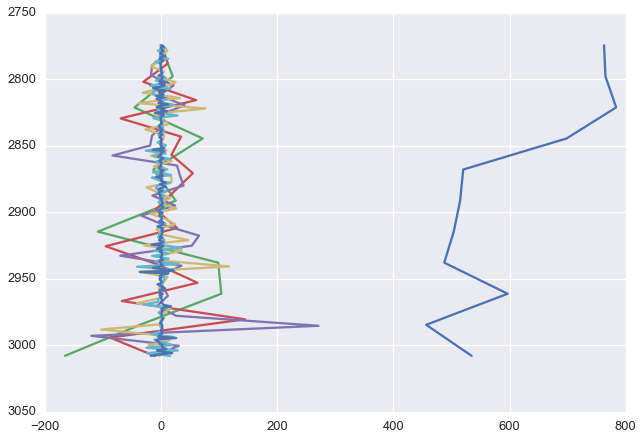

In [140]:
fig,ax = plt.subplots()
ax.invert_yaxis()
ax.plot(cA6,np.linspace(min(depth),max(depth),len(cA6)))
ax.plot(cD6,np.linspace(min(depth),max(depth),len(cD6)))
ax.plot(cD5,np.linspace(min(depth),max(depth),len(cD5)))
ax.plot(cD4,np.linspace(min(depth),max(depth),len(cD4)))
ax.plot(cD3,np.linspace(min(depth),max(depth),len(cD3)))
ax.plot(cD2,np.linspace(min(depth),max(depth),len(cD2)))
ax.plot(cD1,np.linspace(min(depth),max(depth),len(cD1)));

In [141]:
pywt.central_frequency(db3)

0.80000000000000004

In [142]:
from scipy.interpolate import interp1d

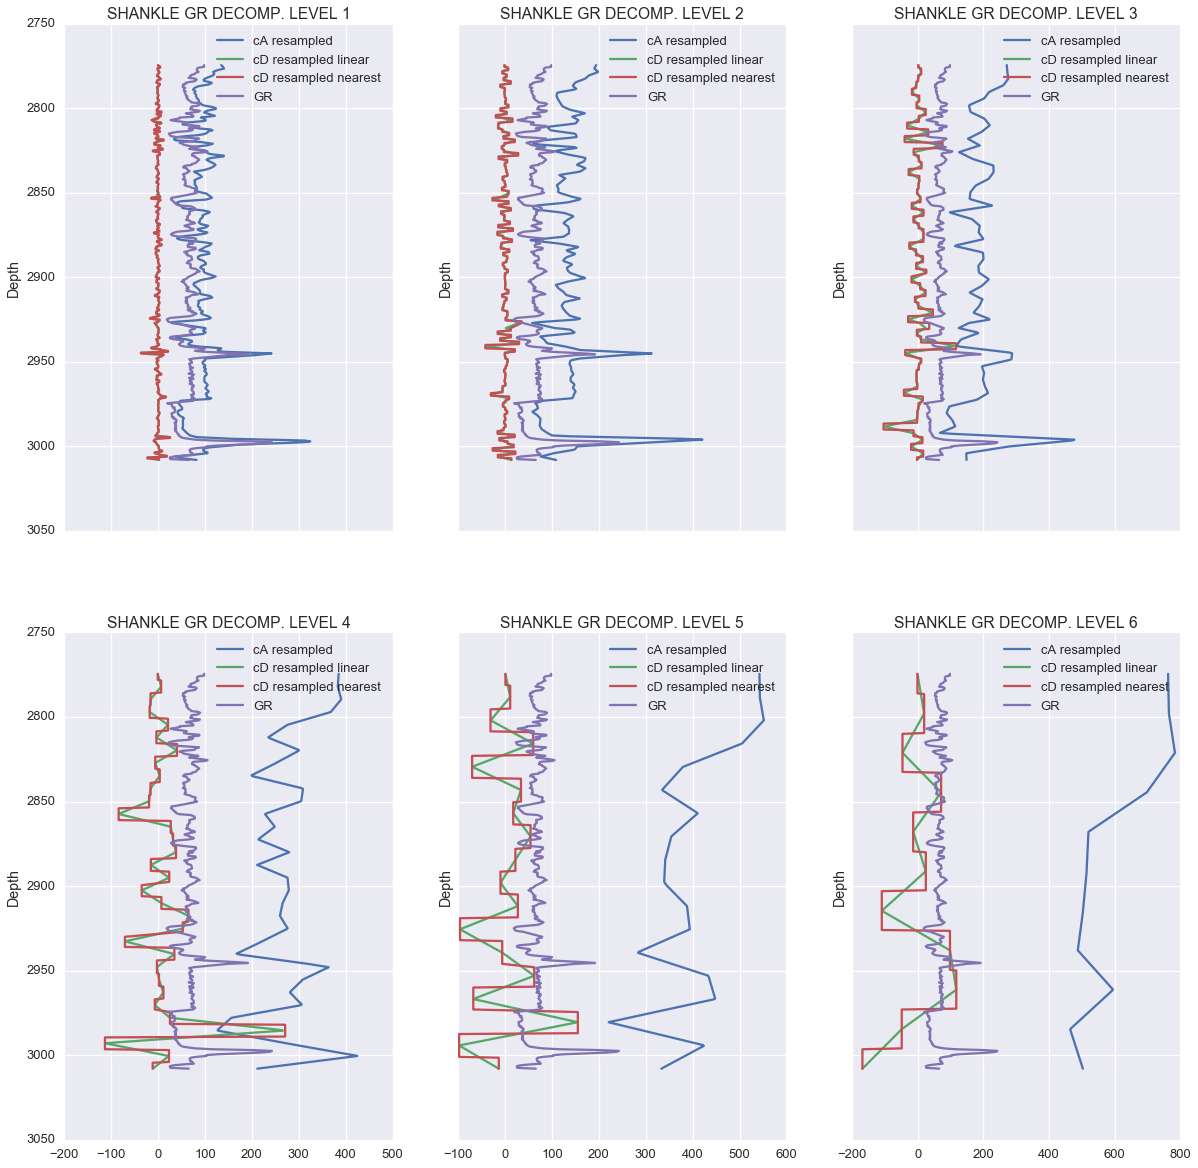

In [144]:
n_levels = 6

fig, axs = plt.subplots(figsize=(20,20), 
                        nrows=2, ncols=3, 
                        #gridspec_kw=dict(hspace=0.4),
                        sharey='row',sharex='col') # Much control of gridspec
for i in range(nrows):
    axs[i,0].invert_yaxis()


temp_data = data
for i,ax in zip(range(1,n_levels+1),axs.flatten()):
    
    cA,cD = pywt.dwt(temp_data,db3,mode='symmetric')
    
    new_depth = np.linspace(min(depth),max(depth),len(cD))
    f1 = interp1d(new_depth,cD,kind='linear')
    f2 = interp1d(new_depth,cD,kind='nearest')
    f3 = interp1d(new_depth,cA,kind='linear')
    
    cD1 = f1(depth)
    cD2 = f2(depth)
    cA1 = f3(depth)
    
    ax.plot(cA1,depth)
    ax.plot(cD1,depth)
    ax.plot(cD2,depth)
    ax.plot(data,depth)
    ax.set_title('SHANKLE GR DECOMP. LEVEL %d' % (i))
    ax.set_ylabel('Depth')
    ax.legend(['cA resampled','cD resampled linear','cD resampled nearest','GR'])
    temp_data = cA